In [1]:
import requests
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
#pip install soccerplots

In [2]:
url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"

In [3]:
data_url = requests.get(url)

In [4]:
data_text = data_url.text

In [5]:
df = pd.read_html(data_text)

In [6]:
#type(df)

In [7]:
#df[0].head(10)

In [8]:
#df[0].info()

In [9]:
# reduce number of columns 
data = df[0].iloc[:, [1,3,4,5,6,11,12,13,14,15,16,20,21,22,23]]

# remove the first layer of headers
data.columns = data.columns.map(lambda x: x[1].split(',')[0].replace(" ", ""))
#data.head(10)

In [10]:
# Converting to integers, end handling errors 

# Starting index (assuming '90s' is at index 5)
start_index = 5

# Loop through columns from start_index to the end
for col in data.columns[start_index:]:
    data[col] = pd.to_numeric(data[col], errors='coerce') 

In [11]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    2904 non-null   object 
 1   Pos       2904 non-null   object 
 2   Squad     2904 non-null   object 
 3   Comp      2904 non-null   object 
 4   Age       2900 non-null   object 
 5   90s       2793 non-null   float64
 6   Gls       2793 non-null   float64
 7   Ast       2793 non-null   float64
 8   G+A       2793 non-null   float64
 9   G-PK      2793 non-null   float64
 10  PK        2793 non-null   float64
 11  xG        2773 non-null   float64
 12  npxG      2773 non-null   float64
 13  xAG       2773 non-null   float64
 14  npxG+xAG  2773 non-null   float64
dtypes: float64(10), object(5)
memory usage: 340.4+ KB


In [12]:
# Creating /90s for every stat 

# Starting index (assuming 'Gls' is at index 6)
start_index = 6

# Loop through columns from start_index to the end
for col in data.columns[start_index:]:
    data[f"{col}/90"] = data[col] / data['90s'] # Change to /90s

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       2904 non-null   object 
 1   Pos          2904 non-null   object 
 2   Squad        2904 non-null   object 
 3   Comp         2904 non-null   object 
 4   Age          2900 non-null   object 
 5   90s          2793 non-null   float64
 6   Gls          2793 non-null   float64
 7   Ast          2793 non-null   float64
 8   G+A          2793 non-null   float64
 9   G-PK         2793 non-null   float64
 10  PK           2793 non-null   float64
 11  xG           2773 non-null   float64
 12  npxG         2773 non-null   float64
 13  xAG          2773 non-null   float64
 14  npxG+xAG     2773 non-null   float64
 15  Gls/90       2742 non-null   float64
 16  Ast/90       2742 non-null   float64
 17  G+A/90       2742 non-null   float64
 18  G-PK/90      2742 non-null   float64
 19  PK/90 

In [14]:
# remove goalkeepers and players with less then 900 minutes played

# Minimum minutes threshold (10 x 90s)
played_90s = 10

# Filter players excluding GK and ensuring minimum minutes
filtered_df = data[(data['Pos'] != 'GK') & (data['90s'] >= played_90s)]

In [15]:
filtered_df.head(10)

,Player,Pos,Squad,Comp,Age,90s,Gls,Ast,G+A,G-PK,...,npxG+xAG,Gls/90,Ast/90,G+A/90,G-PK/90,PK/90,xG/90,npxG/90,xAG/90,npxG+xAG/90
0,Max Aarons,DF,Bournemouth,eng Premier League,24-125,13.0,0.0,1.0,1.0,0.0,...,0.9,0.000000,0.076923,0.076923,0.000000,0.0,0.000000,0.000000,0.061538,0.069231
1,Brenden Aaronson,"MF,FW",Union Berlin,de Bundesliga,23-199,12.6,2.0,1.0,3.0,2.0,...,3.5,0.158730,0.079365,0.238095,0.158730,0.0,0.150794,0.150794,0.126984,0.277778
4,Yunis Abdelhamid,DF,Reims,fr Ligue 1,36-223,27.9,3.0,0.0,3.0,3.0,...,2.9,0.107527,0.000000,0.107527,0.107527,0.0,0.093190,0.093190,0.010753,0.103943
5,Salis Abdul Samed,MF,Lens,fr Ligue 1,24-043,16.8,0.0,0.0,0.0,0.0,...,1.3,0.000000,0.000000,0.000000,0.000000,0.0,0.047619,0.047619,0.029762,0.077381
6,Laurent Abergel,MF,Lorient,fr Ligue 1,31-097,29.8,1.0,1.0,2.0,1.0,...,3.1,0.033557,0.033557,0.067114,0.033557,0.0,0.033557,0.033557,0.070470,0.104027
8,Abner,DF,Betis,es La Liga,23-347,14.5,0.0,0.0,0.0,0.0,...,0.7,0.000000,0.000000,0.000000,0.000000,0.0,0.006897,0.006897,0.041379,0.048276
10,Abdel Abqar,DF,Alavés,es La Liga,25-059,22.2,0.0,0.0,0.0,0.0,...,0.4,0.000000,0.000000,0.000000,0.000000,0.0,0.013514,0.013514,0.004505,0.018018
12,Francesco Acerbi,DF,Inter,it Serie A,36-088,24.5,3.0,1.0,4.0,3.0,...,3.3,0.122449,0.040816,0.163265,0.122449,0.0,0.065306,0.065306,0.069388,0.134694
14,Marcos Acuña,DF,Sevilla,es La Liga,32-193,12.2,1.0,2.0,3.0,1.0,...,1.7,0.081967,0.163934,0.245902,0.081967,0.0,0.024590,0.024590,0.114754,0.139344
17,Akor Adams,FW,Montpellier,fr Ligue 1,24-100,23.8,8.0,1.0,9.0,8.0,...,13.9,0.336134,0.042017,0.378151,0.336134,0.0,0.512605,0.512605,0.075630,0.584034


In [16]:
# select two players

player_1 = "Harry Kane"
player_2 = "Kylian Mbappé"

player_df = filtered_df[(filtered_df.iloc[:, 0]==player_1) | (filtered_df.iloc[:, 0]==player_2)].reset_index()
player_df

,index,Player,Pos,Squad,Comp,Age,90s,Gls,Ast,G+A,...,npxG+xAG,Gls/90,Ast/90,G+A/90,G-PK/90,PK/90,xG/90,npxG/90,xAG/90,npxG+xAG/90
0,1326,Harry Kane,FW,Bayern Munich,de Bundesliga,30-285,31.5,36.0,8.0,44.0,...,33.0,1.142857,0.253968,1.396825,0.984127,0.15873,0.971429,0.847619,0.203175,1.047619
1,1721,Kylian Mbappé,FW,Paris S-G,fr Ligue 1,25-140,23.0,26.0,7.0,33.0,...,19.1,1.130435,0.304348,1.434783,0.869565,0.26087,0.865217,0.586957,0.243478,0.830435


In [17]:
selected_metrics = ['Gls/90','G-PK/90','Ast/90','PK/90','xG/90','npxG/90','xAG/90','G+A/90','npxG+xAG/90']

metrics = ['Player']+selected_metrics

player_df = player_df[metrics]
player_df

,Player,Gls/90,G-PK/90,Ast/90,PK/90,xG/90,npxG/90,xAG/90,G+A/90,npxG+xAG/90
0,Harry Kane,1.142857,0.984127,0.253968,0.15873,0.971429,0.847619,0.203175,1.396825,1.047619
1,Kylian Mbappé,1.130435,0.869565,0.304348,0.26087,0.865217,0.586957,0.243478,1.434783,0.830435


In [18]:
# create a range for every stat (zero to the best player in that stat) 

ranges = [] 

for x in selected_metrics:
    a = 0

    b = max(filtered_df[selected_metrics][x])
    #b = float(b + (b*.25)) # formating decision to give an extra 25% 

    ranges.append((a,b))

ranges

[(0, 1.1428571428571428),
 (0, 0.9841269841269841),
 (0, 0.7272727272727273),
 (0, 0.37593984962406013),
 (0, 1.0274509803921568),
 (0, 0.8476190476190476),
 (0, 0.7727272727272727),
 (0, 1.434782608695652),
 (0, 1.0476190476190477)]

In [19]:
# creating the stats of the players
for x in range(len(player_df['Player'])):
    if player_df['Player'][x] == player_1:
        a_values = player_df.iloc[x].values.tolist()
    if player_df['Player'][x] == player_2:
        b_values = player_df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]
values = [a_values,b_values]
values        

[[1.1428571428571428,
  0.9841269841269841,
  0.25396825396825395,
  0.15873015873015872,
  0.9714285714285714,
  0.8476190476190476,
  0.20317460317460317,
  1.3968253968253967,
  1.0476190476190477],
 [1.1304347826086956,
  0.8695652173913043,
  0.30434782608695654,
  0.2608695652173913,
  0.8652173913043477,
  0.5869565217391305,
  0.2434782608695652,
  1.434782608695652,
  0.8304347826086957]]

In [20]:
color_1 = "red"
color_2 = "blue"


title = dict(
    title_name= player_1,
    title_color = color_1,
    title_name_2 = player_2,
    title_color_2 = color_2,
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = 'Data from FBREF'

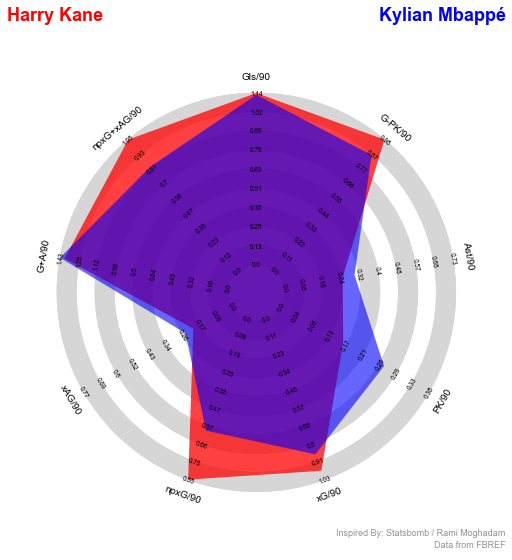

In [22]:
from soccerplots.radar_chart import Radar

radar = Radar(fontfamily="Arial")
fig,ax = radar.plot_radar(ranges=ranges,params=selected_metrics,values=values,
                         radar_color=[color_1,color_2],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)